# Gráficos de controle por variáveis e por atributos (fração não-conforme)

Prof. Cibele Russo

SME0824 Gestão da Qualidade


Fontes: 

- https://www.kaggle.com/nalkrolu/statistical-process-control-quality-control

- https://pypi.org/project/GaugeRnR/

# Pacotes

In [1]:
# Instalar se necessário
!pip install GaugeRnR

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import GaugeRnR
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import pandas as pd
plt.style.use('seaborn-colorblind')

# Classes

In [3]:
def Pareto(problems, values):
    df = pd.DataFrame({'Values': values})
    df.index = problems
    df = df.sort_values(by='Values',ascending=False)
    df["cumpercentage"] = df["Values"].cumsum()/df["Values"].sum()*100
    
    plt.figure(figsize=(14,6))
    plt.bar(df.index, df["Values"], color="C0")
    plt.xticks(rotation=70)
    ax = plt.twinx()
    ax.plot(df.index, df["cumpercentage"], color="r", marker="D")
    ax.yaxis.set_major_formatter(PercentFormatter())
    plt.title("Pareto Diagram")
    plt.tick_params(axis="y", colors="k")
    plt.tick_params(axis="y", colors="r")
    plt.grid()
    plt.show()

In [4]:
class XR_ControlChart:
    
    def fit(self,data):
        
        self.sample_size = len(data[0])
        self.number_of_sample = len(data)
        self.X = np.zeros((self.number_of_sample,1))
        self.R = np.zeros((self.number_of_sample,1))

        for i in range(self.number_of_sample):
            self.X[i] = data[i].mean()
            self.R[i] = data[i].max() - data[i].min()
        
        self.data = data
        
    def ControlChart(self,A2,D3,D4):

        ucl_X   = self.X.mean() + A2*self.R.mean()
        cl_X    = self.X.mean() 
        lcl_X   = self.X.mean() - A2*self.R.mean()

        ucl_R   = D4*self.R.mean()
        cl_R    = self.R.mean() 
        lcl_R   = D3*self.R.mean()
        
        plt.figure(figsize=(15,5))
        plt.title("Boxplot for {} Observations\nSample Size {}".format(len(self.data),len(self.data[0])))
        plt.boxplot(self.data.T)
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.X,marker="o",color="k",label="X")
        plt.plot([ucl_X]*len(self.X),color="r",label="UCL={}".format(ucl_X.round(2)))
        plt.plot([cl_X]*len(self.X),color="b",label="CL={}".format(cl_X.round(2)))
        plt.plot([lcl_X]*len(self.X),color="r",label="LCL={}".format(lcl_X.round(2)))
        plt.title("X Chart")
        plt.xticks(np.arange(len(self.data)))
        plt.legend()
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.R,marker="o",color="k",label="R")
        plt.plot([ucl_R]*len(self.X),color="r",label="UCL={}".format(ucl_R.round(2)))
        plt.plot([cl_R]*len(self.X),color="b",label="CL={}".format(cl_R.round(2)))
        plt.plot([lcl_R]*len(self.X),color="r",label="LCL={}".format(lcl_R.round(2)))
        plt.title("R Chart")
        plt.xticks(np.arange(len(self.data)))
        plt.legend()
        plt.show()
        
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.boxplot(x=self.X)
        plt.title("Boxplot X")
        plt.xlabel("X")
        plt.subplot(1,2,2)
        plt.boxplot(x=self.R)
        plt.title("Boxplot R")
        plt.xlabel("R")
        plt.show()

In [5]:
class XS_ControlChart:
    
    def fit(self,data):
        
        self.sample_size = len(data[0])
        self.number_of_sample = len(data)
        self.X = np.zeros((self.number_of_sample,1))
        self.S = np.zeros((self.number_of_sample,1))

        for i in range(self.number_of_sample):
            self.X[i] = data[i].mean()
            self.S[i] = data[i].std()
        
        self.data = data
        
    def ControlChart(self,A3,B3,B4):

        ucl_X   = self.X.mean() + A3*self.S.mean()
        cl_X    = self.X.mean() 
        lcl_X   = self.X.mean() - A3*self.S.mean()

        ucl_S   = B4*self.S.mean()
        cl_S    = self.S.mean() 
        lcl_S   = B3*self.S.mean()
        
        plt.figure(figsize=(15,5))
        plt.title("Boxplot for {} Observations\nSample Size {}".format(len(self.data),len(self.data[0])))
        plt.boxplot(self.data.T)
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.X,marker="o",color="k",label="X")
        plt.plot([ucl_X]*len(self.X),color="r",label="UCL={}".format(ucl_X.round(2)))
        plt.plot([cl_X]*len(self.X),color="b",label="CL={}".format(cl_X.round(2)))
        plt.plot([lcl_X]*len(self.X),color="r",label="LCL={}".format(lcl_X.round(2)))
        plt.title("X Chart")
        plt.xticks(np.arange(len(self.data)))
        plt.legend()
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.S,marker="o",color="k",label="S")
        plt.plot([ucl_S]*len(self.X),color="r",label="UCL={}".format(ucl_S.round(2)))
        plt.plot([cl_S]*len(self.X),color="b",label="CL={}".format(cl_S.round(2)))
        plt.plot([lcl_S]*len(self.X),color="r",label="LCL={}".format(lcl_S.round(2)))
        plt.title("S Chart")
        plt.xticks(np.arange(len(self.data)))
        plt.legend()
        plt.show()
        
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.boxplot(x=self.X)
        plt.title("Boxplot X")
        plt.xlabel("X")
        plt.subplot(1,2,2)
        plt.boxplot(x=self.S)
        plt.title("Boxplot S")
        plt.xlabel("S")
        plt.show()

In [6]:
class p_ControlChart:
    def fit(self,D,n):
        self.D = D
        self.n = n 
        self.p = np.zeros(len(self.D)) 
        for i in range(len(D)):
            self.p[i] = D[i] / n
    
    def ControlChart(self):
        m      = len(self.p)
        p_mean = self.p.sum() / m
        
        ucl = p_mean + 3*np.sqrt((p_mean*(1-p_mean))/(self.n))
        cl  = p_mean
        lcl = p_mean - 3*np.sqrt((p_mean*(1-p_mean))/(self.n)) 
        
        plt.figure(figsize=(15,5))
        plt.plot(self.p,marker="o",color="k",label="$p_i$")
        plt.plot([ucl]*(len(self.D)),label="UCL",color="r")
        plt.plot([cl]*(len(self.D)),label="CL",color="k",alpha=0.4)
        plt.plot([lcl]*(len(self.D)),label="LCL",color="r")
        plt.legend(loc="best")
        plt.xticks(np.arange(len(self.D)))
        plt.title("p Control Chart")
        plt.show()
        
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.boxplot(self.D,vert=False)
        plt.title("Boxplot of Data")
        plt.ylabel("Data")
        plt.subplot(1,2,2)
        plt.hist(self.D,bins=int(len(self.D)/3),density=True,color="blue")
        plt.ylabel("Frequency")
        plt.title("Histogram of Data")
        plt.show()

# Dados


In [7]:
# Gráfico de Pareto (um exemplo)
problems=['Anodização com produto em pó','Carenagem sem acabamento','Composto delaminado','Dimensões incorretas','Falha no adesivo',
'Falha no spray salinizado','Fora de ordem','Máquina','Película nas peças','Peça errada produzida',
'Peças danificadas','Peças enferrujadas','Pintura danificada','Pintura fora dos limites','Porosidade na fundição','Primer danificada','Procedimento impróprio','Revestimento insuficiente','Solda desalinhada'
]
values=[1,3,2,36,6,4,4,29,5,3,34,13,1,2,2,1,1,17,1]

#(outros exemplos)

cozimento =  pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Gestao-da-qualidade/main/Dados/Cozimento.csv', sep=';', decimal=',')
dados = cozimento[['x1', 'x2', 'x3', 'x4', 'x5']]

data = np.array([[57, 46, 62, 23, 19],
       [52, 49, 42, 60, 32],
       [64, 53, 33, 20, 32],
       [46, 61, 55, 24, 44],
       [26, 47, 21, 62, 48],
       [36, 64, 63, 42, 38],
       [22, 52, 44, 49, 43],
       [56, 38, 56, 44, 46],
       [52, 33, 40, 30, 65],
       [57, 55, 30, 35, 46],
       [53, 24, 63, 49, 43],
       [24, 33, 38, 67, 24],
       [65, 36, 32, 48, 35],
       [38, 61, 48, 43, 38],
       [68, 42, 21, 29, 43],
       [60, 48, 44, 19, 60],
       [43, 28, 32, 65, 22],
       [57, 47, 69, 56, 24],
       [31, 29, 48, 63, 42],
       [39, 68, 20, 51, 26]])

data2 = np.array([296, 289, 309, 302, 308, 291, 298, 288, 305, 303, 296, 294, 297,       308, 294, 308, 292, 300, 299, 291])

data3 = np.array([ 9.86309233,  9.84000103, 10.97886276,  9.50805567,  9.79770921,       10.3763538 , 10.77708283, 10.91984387, 10.58749389, 10.55658341,
       10.56227153,  9.23660779, 10.66084511, 10.12406454,  9.22176616,       10.23525939,  9.63873061, 10.63521265,  9.34684212,  9.74626569,
        9.55167571,  9.203874  ,  9.11321254,  9.28478856, 10.21514137,       10.93835811,  9.00417726, 10.20495895, 10.12245382,  9.46752498])


data6 =  np.array([12,15,8,10,4,7,16,9,14,10,5,6,17,12,22,8,10,5,13,11,20,18,24,15,9,12,7,13,9,6])

# Pareto Diagram

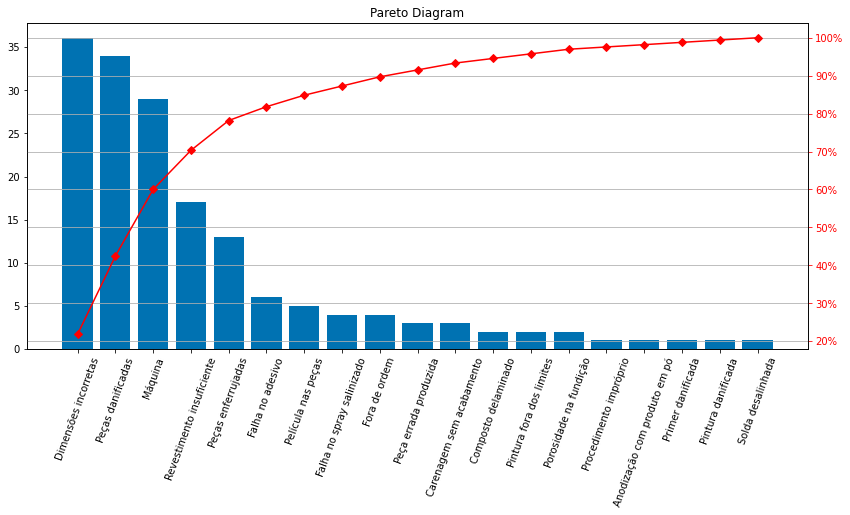

In [8]:
Pareto(problems,values)

# Gráfico Xbarra-R




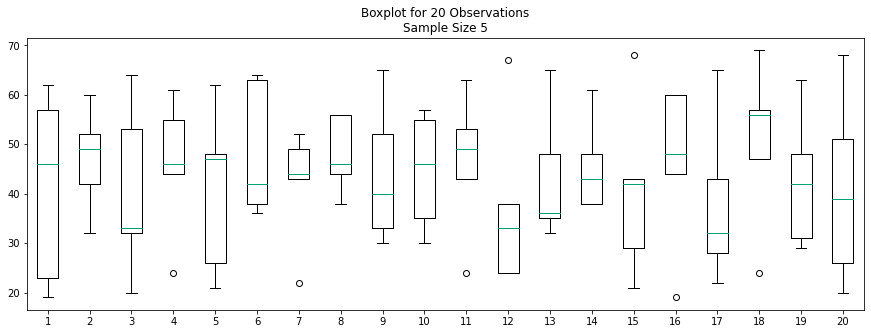

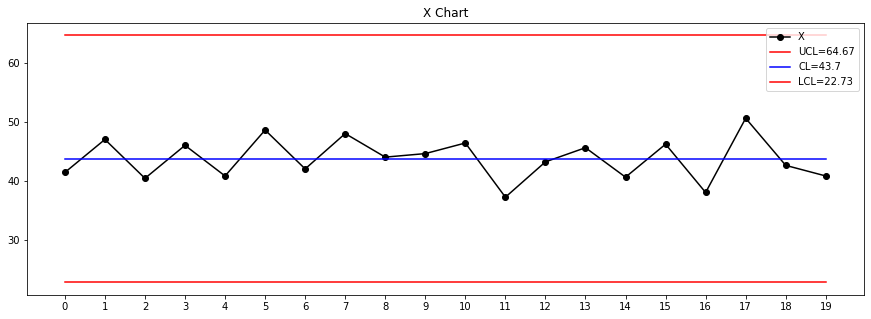

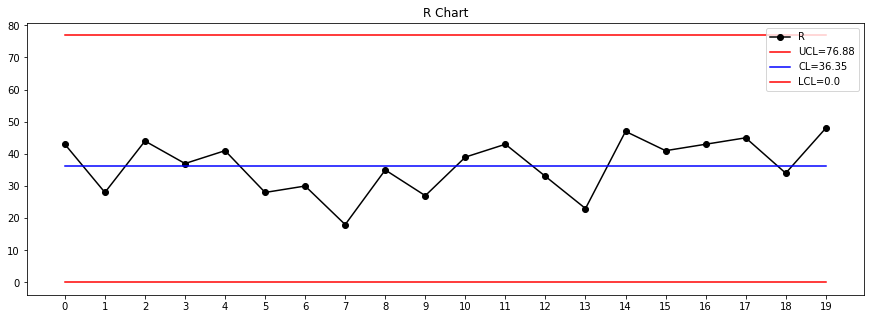

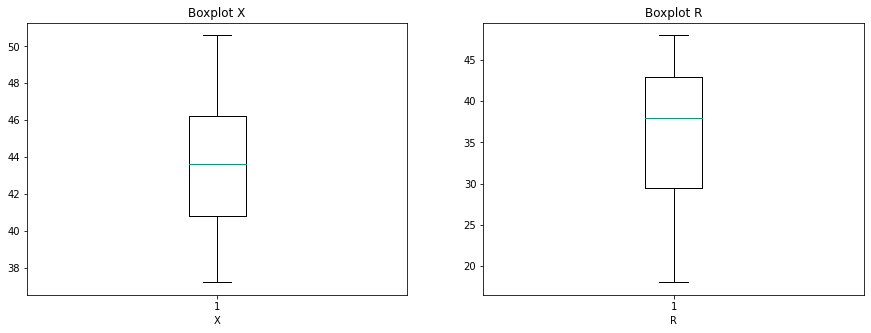

In [9]:
chart = XR_ControlChart()
chart.fit(data)
chart.ControlChart(A2 = 0.577,D3 = 0 ,D4 = 2.115)

#Gráfico Xbarra-S

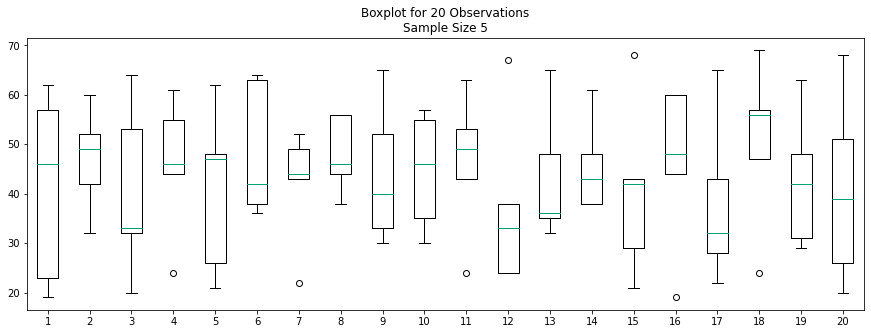

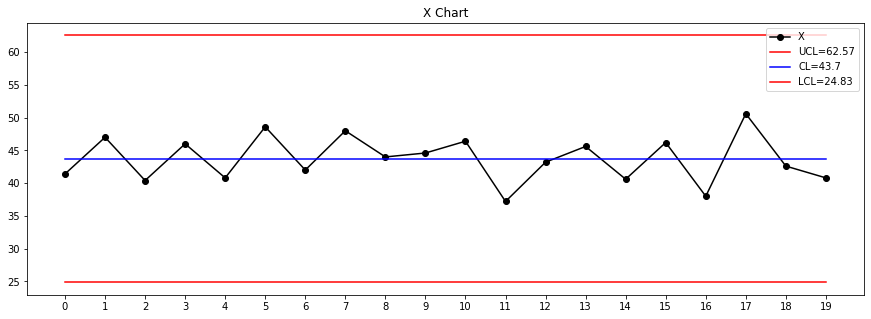

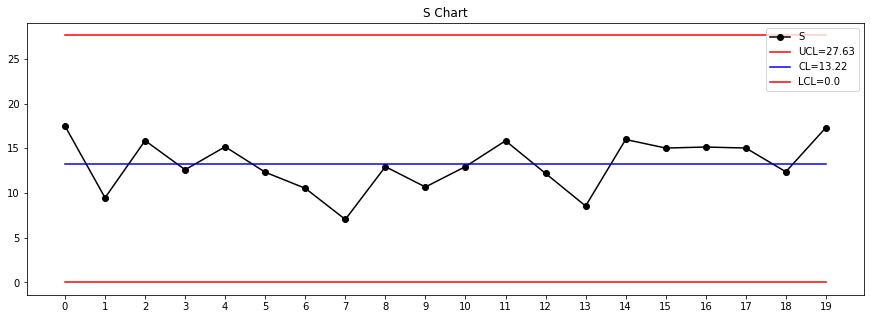

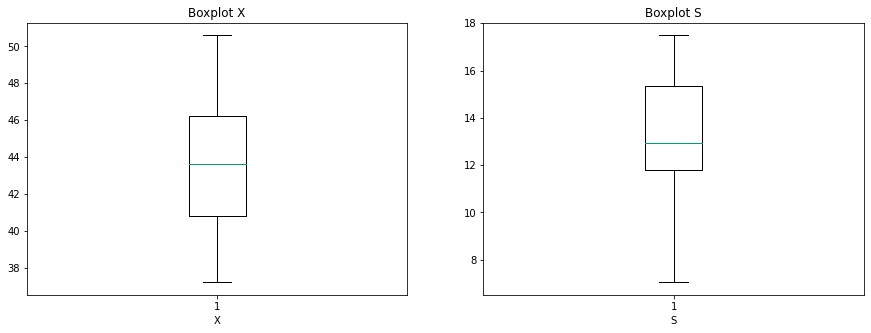

In [10]:
chart = XS_ControlChart()
chart.fit(data)
chart.ControlChart(A3 = 1.427 ,B3 = 0 ,B4 = 2.089)

# Gráfico de controle para a fração não conforme

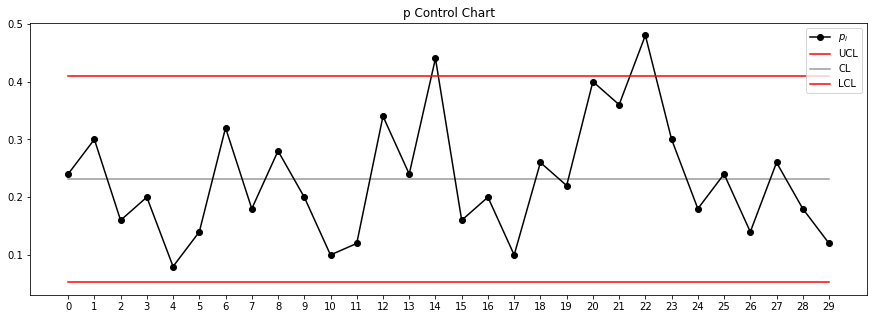

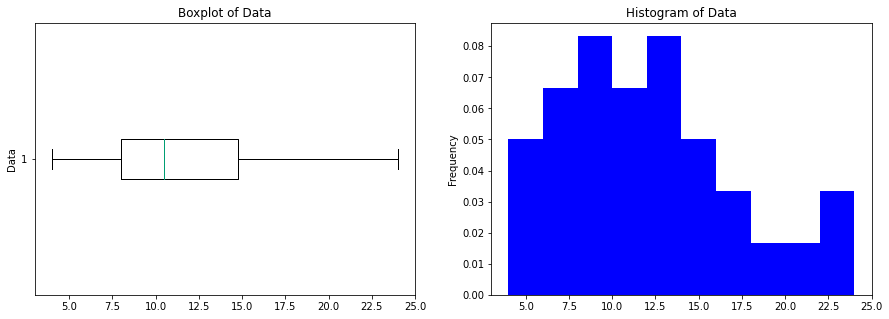

In [11]:
chart = p_ControlChart()
chart.fit(D=data6,n=50)
chart.ControlChart()